<a href="https://colab.research.google.com/github/Fazloussatter/Amazon_Stock-_Price_-Prediction/blob/main/Fazlous_Amazon_Stock_Price_Prediction_Using_Historic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Amazon Stock Price Prediction using 5 YearsHistoric Data

###Importing essential packages

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [162]:
# Initializing the plotly
import plotly.io as pio
pio.renderers.default='colab'

### Importing Yahoo Finance

In [163]:
import yfinance as yf

### Importing 5 years historic stock data of Amazon

In [164]:
df=pd.read_csv('AMZN (1).csv')


### Now checking a few rows of the dataset

In [165]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/15/2019,85.150002,85.940002,84.656502,85.617996,85.617996,151018000
1,3/18/2019,85.635002,87.500000,85.631500,87.107498,87.107498,108582000
2,3/19/2019,87.675499,89.208000,87.675499,88.092499,88.092499,127284000
3,3/20/2019,88.497002,89.974998,88.351501,89.863503,89.863503,125312000
4,3/21/2019,89.813004,91.187500,89.363998,90.962997,90.962997,115356000


###Displaying number of rows, number of columns.

In [166]:
df.shape

(1259, 7)

### Displaying all column names.

In [167]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Gathering basic information about the data

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


### Gathering descriptive statistics about the data

In [169]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,130.985617,132.578373,129.303925,130.965143,130.965143,7.349120e+07
std,30.716544,30.977310,30.391822,30.652812,30.652812,3.271323e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,1.762600e+07
25%,98.178749,99.575752,96.855004,98.211750,98.211750,5.181325e+07
50%,131.940002,133.309998,130.429993,131.839996,131.839996,6.424400e+07
75%,159.700501,161.425751,157.750000,159.438247,159.438247,8.584600e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


### Checking the missing values

In [170]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking duplicates

In [171]:
df.duplicated().sum()

0

### Visualizing the historical performance of Tesla

In [172]:
# Creating an Area Chart

px.area(df, x='Date',y='Close')

In [173]:
# Let's examine this price hike with a Line chart
px.line(df, x='Date',y='Close')

In [174]:
# Now checking the volume by an Area Chat
px.area(df, x='Date',y='Volume')

In [175]:
# Now rechecking it again with a Bar Chart
px.bar(df,y='Volume')

In [176]:
# Now, checking the distribution with a Box Plot
px.box(df,y='Close')

### Again checking the dataframe

In [177]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/15/2019,85.150002,85.940002,84.656502,85.617996,85.617996,151018000
1,3/18/2019,85.635002,87.500000,85.631500,87.107498,87.107498,108582000
2,3/19/2019,87.675499,89.208000,87.675499,88.092499,88.092499,127284000
3,3/20/2019,88.497002,89.974998,88.351501,89.863503,89.863503,125312000
4,3/21/2019,89.813004,91.187500,89.363998,90.962997,90.962997,115356000


### Seecting the columns and creating a new dataframe

In [178]:
columns=['Date', 'Close']
ndf=pd.DataFrame(df, columns=columns)

### Now checking the new dataframe

In [179]:
ndf

,Date,Close
0,3/15/2019,85.617996
1,3/18/2019,87.107498
2,3/19/2019,88.092499
3,3/20/2019,89.863503
4,3/21/2019,90.962997
...,...,...
1254,3/8/2024,175.350006
1255,3/11/2024,171.960007
1256,3/12/2024,175.389999
1257,3/13/2024,176.559998


 ### Now installing and importing FB Prophet for forecasting

In [180]:
!pip install prophet
from prophet import Prophet

### Renaming columns for the forecasting the price ups and down

In [181]:
Prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})
Prophet_df

,ds,y
0,3/15/2019,85.617996
1,3/18/2019,87.107498
2,3/19/2019,88.092499
3,3/20/2019,89.863503
4,3/21/2019,90.962997
...,...,...
1254,3/8/2024,175.350006
1255,3/11/2024,171.960007
1256,3/12/2024,175.389999
1257,3/13/2024,176.559998


## Creating Facebook Prophet Model

In [182]:
m=Prophet()
m.fit(Prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbrlfvsk/38ryroyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbrlfvsk/qll_0wm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81809', 'data', 'file=/tmp/tmplbrlfvsk/38ryroyv.json', 'init=/tmp/tmplbrlfvsk/qll_0wm4.json', 'output', 'file=/tmp/tmplbrlfvsk/prophet_modelmsqaesvm/prophet_model-20240315114942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting/ prediction on Facebook prophet

In [183]:
future=m.make_future_dataframe(periods=60)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-15,91.800707,79.173229,98.295185,91.800707,91.800707,-3.371632,-3.371632,-3.371632,1.294976,1.294976,1.294976,-4.666608,-4.666608,-4.666608,0.0,0.0,0.0,88.429075
1,2019-03-18,91.723613,79.863585,97.805153,91.723613,91.723613,-2.605071,-2.605071,-2.605071,1.476429,1.476429,1.476429,-4.081500,-4.081500,-4.081500,0.0,0.0,0.0,89.118542
2,2019-03-19,91.697915,79.377534,98.315456,91.697915,91.697915,-2.504263,-2.504263,-2.504263,1.359937,1.359937,1.359937,-3.864200,-3.864200,-3.864200,0.0,0.0,0.0,89.193653
3,2019-03-20,91.672218,80.430832,98.149920,91.672218,91.672218,-2.199449,-2.199449,-2.199449,1.440877,1.440877,1.440877,-3.640326,-3.640326,-3.640326,0.0,0.0,0.0,89.472768
4,2019-03-21,91.646520,80.048105,98.799258,91.646520,91.646520,-1.944237,-1.944237,-1.944237,1.467560,1.467560,1.467560,-3.411797,-3.411797,-3.411797,0.0,0.0,0.0,89.702283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2024-05-09,179.881818,167.775166,186.652673,178.362614,181.579513,-3.363671,-3.363671,-3.363671,1.467560,1.467560,1.467560,-4.831230,-4.831230,-4.831230,0.0,0.0,0.0,176.518147
1315,2024-05-10,180.075672,166.777707,186.274738,178.460448,181.846656,-3.855992,-3.855992,-3.855992,1.294976,1.294976,1.294976,-5.150968,-5.150968,-5.150968,0.0,0.0,0.0,176.219680
1316,2024-05-11,180.269526,161.493479,180.884532,178.603742,182.098502,-8.938616,-8.938616,-8.938616,-3.519890,-3.519890,-3.519890,-5.418727,-5.418727,-5.418727,0.0,0.0,0.0,171.330910
1317,2024-05-12,180.463381,161.516678,180.640249,178.761393,182.365911,-9.152102,-9.152102,-9.152102,-3.519889,-3.519889,-3.519889,-5.632213,-5.632213,-5.632213,0.0,0.0,0.0,171.311279


### As yhat column is most importan, so we are now creating a Line Chart with that.

In [184]:
px.line(forecast, x='ds', y='yhat')

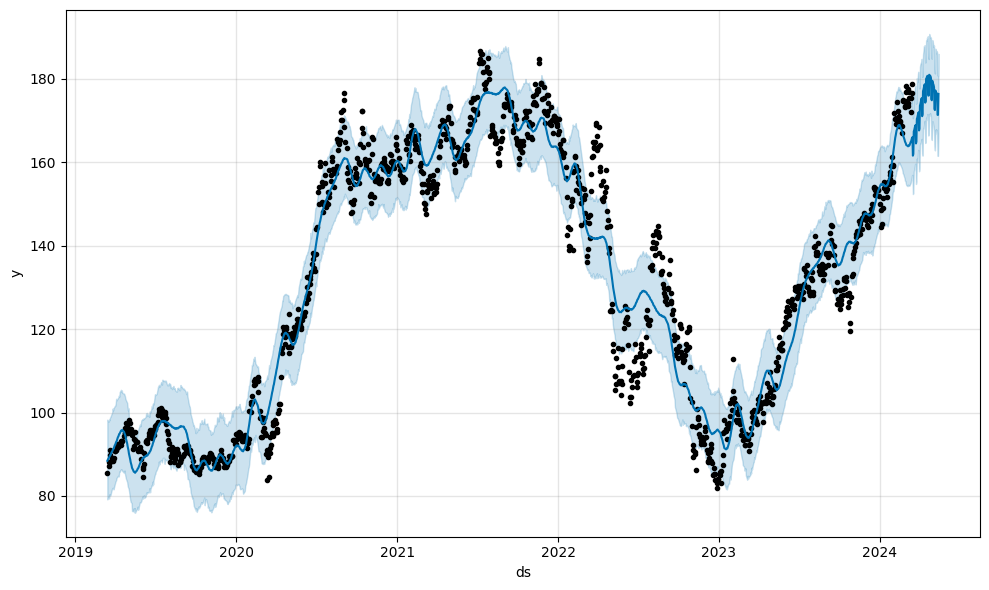

In [185]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

### Importing matplotlib to observe the various components

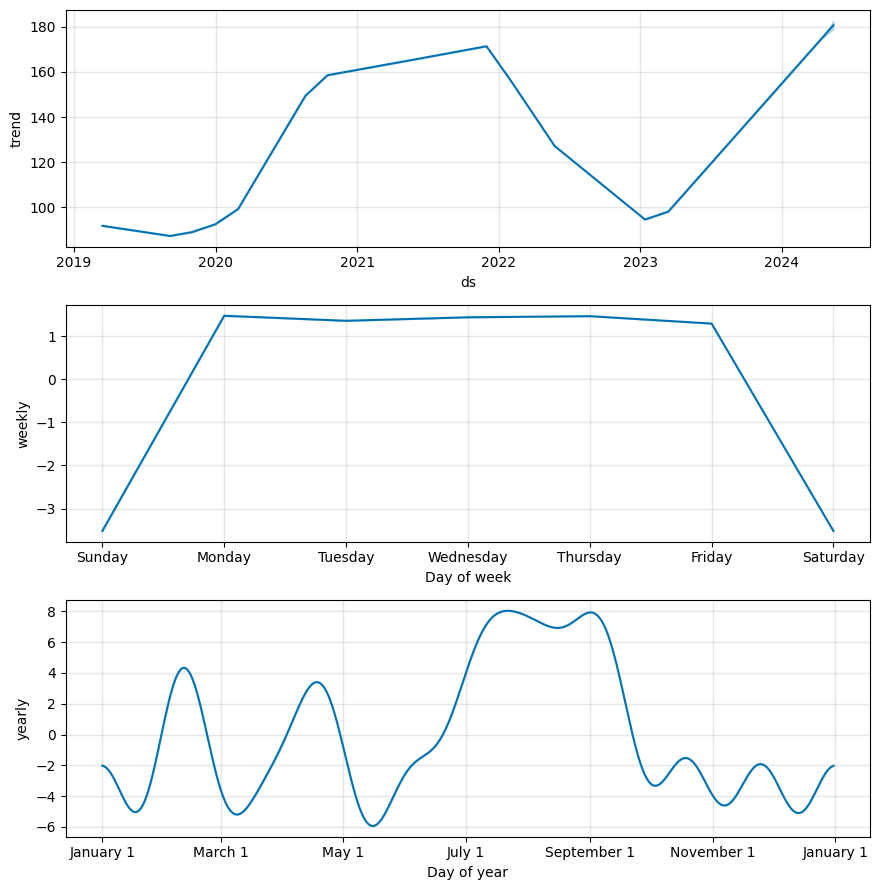

In [186]:
import matplotlib.pyplot as plt
figure2=m.plot_components(forecast)